<a href="https://colab.research.google.com/github/code-1-mukul/Deep-Learning-Models/blob/main/Churn_Prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### There are certain columns that has no relation with our goal so let's remove them

In [ ]:
df.drop(columns=['CustomerId','Surname','RowNumber'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Gender'>

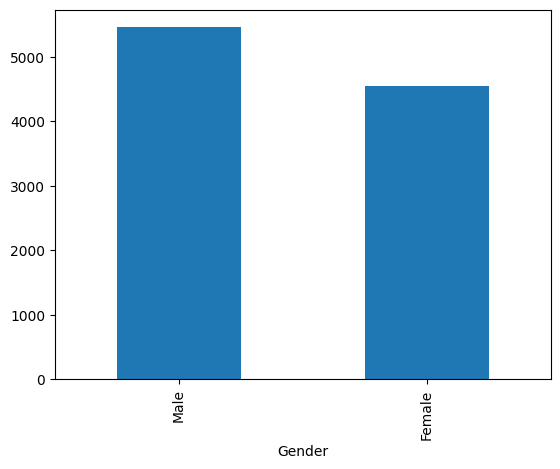

In [ ]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

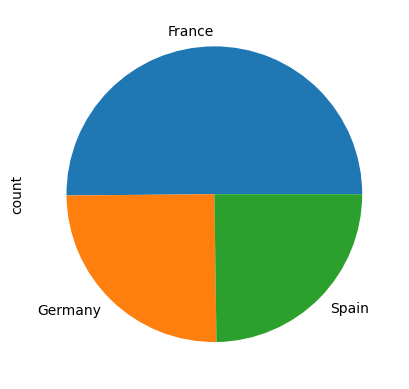

In [ ]:
df['Geography'].value_counts().plot(kind='pie')

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('Exited',axis=1)
y = df['Exited']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### So Let's Design our pipeline for developing our model

#### since there are no missiing values, we start with encoding

#### 1. Encoding
#### 2. Scaling
#### 3. Feature Selection
#### 4. Developing Model

In [ ]:
# Importing Libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
# 1.Encoding
trf1 = ColumnTransformer([
    ('ohe_gen_geo',OneHotEncoder(drop='first',sparse_output=False),['Gender','Geography'])
],remainder='passthrough')

# 2.Scaling
trf2 = ColumnTransformer([('scaler',StandardScaler(),slice(0,11))])

In [ ]:
# 4. Developing the neural network using keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# adding input layer with 3 neurons
model.add(Dense(3,activation='sigmoid',input_dim=11))

# adding output layer with 1 neuron
model.add(Dense(1,activation='sigmoid'))

# compiling model and setting loss and optimizer
model.compile(
        loss='binary_crossentropy',
        optimizer='Adam',
        metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
]
)

x_train_new = pipe.fit_transform(x_train)
x_test_new = pipe.transform(x_test)

In [ ]:
train_res = model.fit(x_train_new,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3597 - loss: 0.7906
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7168 - loss: 0.6130
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7915 - loss: 0.5305
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7881 - loss: 0.4966
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.4792
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4655
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4483
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7932 - loss: 0.4429
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4367
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7911 - loss: 0.4510


Our updated weights

In [ ]:
model.layers[0].get_weights()

[array([[-0.533686  ,  0.07021426,  0.619243  ],
        [ 0.6056554 , -0.58923644, -0.13700676],
        [-0.02496379, -0.03277903, -0.05881015],
        [-0.39398354, -0.23004182,  0.3256887 ],
        [ 0.6287725 , -1.030856  , -1.5775695 ],
        [-0.2670888 , -0.01237606,  0.01396084],
        [ 0.35942847, -0.24084571, -0.08094649],
        [ 0.14222975,  0.04284155,  0.25449473],
        [-0.14003329, -0.173117  ,  0.16069624],
        [-0.8398679 ,  0.6147614 ,  0.32614663],
        [ 0.28702974, -0.05780932,  0.23566544]], dtype=float32),
 array([-0.35833263,  0.33443323,  0.25588712], dtype=float32)]

In [ ]:
y_pred = model.predict(x_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
y_pred

array([[0.21315847],
       [0.08422204],
       [0.32893097],
       ...,
       [0.35507488],
       [0.07010741],
       [0.18811373]], dtype=float32)

y_pred is not 0 and 1 , it has float values because we used sigmoid activation function, now we need to use some threhsold condition

In [ ]:
y_pred = np.where(y_pred>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.8115
